# 스크립트 프로그래밍 (01분반)
## pandas 활용 - DataFrame

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- 예제 중심의 파이썬 입문. 인포앤북
- 파이썬 라이브러리를 활용한 데이터 분석. 한빛미디어

#### DataFrame
- 표와 같은 자료 구조
- 여러 개의 행(row)과 열(column)로 구성됨
  - 각 열은 서로 다른 종류의 값(숫자, 문자열, 불리언 등)을 담을 수 있음
- 행과 열에 대한 인덱스를 가지고 있음

- DataFrame 객체 생성
  - dictinary 값으로 리스트를 사용

In [2]:
import pandas as pd

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [3]:
frame.head() # 처음 5개의 행만 출력

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [4]:
pd.DataFrame(data, columns=['year', 'state', 'pop']) # 원하는 열의 순서로 DataFrame 객체 생성

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [5]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six']) 

# 행에 대한 인덱스는 index, 열에 대한 인덱스는 columns로 설정

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [6]:
frame2['state'] # 열에 대한 인덱스로 해당 열에 대한 데이터만 추출

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [7]:
frame2.state # 위와 동일. 열의 값을 속성처럼 이용

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [8]:
frame2['debt'] = 16.5 # 열 인덱스로 스칼라 값을 할당
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [9]:
import numpy as np

frame2['debt'] = np.arange(6.) # 열 인덱스로 배열 값을 할당
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [10]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

frame2['debt'] = val # Series 객체를 할당. DataFrame의 인덱스에 맞춰 값이 할당되며 존재하지 않는 인덱스에는 누락값으로 할당
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


- DataFrame 요소 추출하기
  - loc 속성: 행 인덱스 이름, 열 인덱스 이름 이용
  - iloc 속성: 행, 열에 해당하는 정수 값을 이용

In [11]:
data = {'학교명':['가나고', '다라고', '마바고', '사아고', '자차고'],
        '학급수' : [25, 23, 15, 19, 10],
        '학생수' : [620, 600, 550, 580, 400],
        '교사수' : [80, 95, 70, 90, 65]}

frame = pd.DataFrame(data,index=['01', '02', '03', '04', '05']) # 행의 인덱스
print(frame)

    학교명  학급수  학생수  교사수
01  가나고   25  620   80
02  다라고   23  600   95
03  마바고   15  550   70
04  사아고   19  580   90
05  자차고   10  400   65


In [12]:
print(frame.loc['02', '학생수']) # '02' 행의 '학생수' 열의 값

600


In [13]:
print(frame.loc['04', ['학교명', '학급수', '교사수']])
# '04' 행의 '학교명','학습수','교사수' 열의 값을 갖음

학교명    사아고
학급수     19
교사수     90
Name: 04, dtype: object


In [14]:
print(frame.loc[:, '학생수']) # 모든 행의 '학생수' 열의 값을 갖음

01    620
02    600
03    550
04    580
05    400
Name: 학생수, dtype: int64


In [15]:
print(frame.loc['01']) # '01' 행의 모든 열의 값

학교명    가나고
학급수     25
학생수    620
교사수     80
Name: 01, dtype: object


In [16]:
data = {'아이디':['kim', 'song', 'han', 'choi'],
        '구매상품' : ['상품A', '상품B', '상품C', '상품D'],
        '가격' : [15000, 23000, 33000, 50000],
        '개수' : [3, 5, 1, 10],
        '구매일' : ['0303', '0810', '0120', '0601']}

frame = pd.DataFrame(data)
frame

,아이디,구매상품,가격,개수,구매일
0,kim,상품A,15000,3,0303
1,song,상품B,23000,5,0810
2,han,상품C,33000,1,0120
3,choi,상품D,50000,10,0601


In [17]:
print(frame.iloc[2, 0]) # 2행 0열의 값

han


In [18]:
print(frame.iloc[3, :2]) # 3행의 0~1열의 값을 갖음

아이디     choi
구매상품     상품D
Name: 3, dtype: object


In [19]:
print(frame.iloc[:, [0, 4]]) # 모든 행의 0열, 4열의 값을 갖음

    아이디   구매일
0   kim  0303
1  song  0810
2   han  0120
3  choi  0601


- 요약 통계 계산
  - sum(): 행 또는 열 방향의 합을 계산
  - mean(): 행 또는 열 방향의 평균을 계산
  - median(): 중간값(50% 분위)를 반환
  - var(), std(): 분산, 표준편찬 값을 계산
  - count(): NA 값을 제외한 값의 수를 반환
  - describe(): Series나 DataFrame의 각 열에 대한 요약 통계를 계산
  - min(), max(): 최소, 최대값 계산
  - argmin(), argmax(): 최소, 최대값을 담고 있는 인덱스의 위치(정수)를 반환
  - idmin(), idmax(): 최소, 최대값을 담고 있는 인덱스의 값을 반환
  - 이외에도 다양한 요약 통계 관련 메소드 존재

In [20]:
scores = {'이름': ['김지영', '안지수', '최성수', '황예린', '김소정'],
        '국어' : [95, 97, 90, 94, 87],
        '영어' : [90, 86, 93, 85, 93],
        '수학' : [85, 88, 89, 88, 99]}

frame = pd.DataFrame(scores)
print(frame)

frame2 = frame.iloc[:, [1, 2, 3]] # 모든 행의 1,2,3 열의 값
print(frame2)

total = frame2.sum(axis = 1) # 행 방향(axis=1)으로 합을 계산, 열 방향(axis=0)
print(total)

    이름  국어  영어  수학
0  김지영  95  90  85
1  안지수  97  86  88
2  최성수  90  93  89
3  황예린  94  85  88
4  김소정  87  93  99
   국어  영어  수학
0  95  90  85
1  97  86  88
2  90  93  89
3  94  85  88
4  87  93  99
0    270
1    271
2    272
3    267
4    279
dtype: int64


In [21]:
avg = frame2.mean(axis = 1) # 행 방향 평균
print(avg)

0    90.000000
1    90.333333
2    90.666667
3    89.000000
4    93.000000
dtype: float64


In [22]:
print('-' * 50)
print('이름    합계  평균')
print('-' * 50)

for i in range(5) :
    print('%s  %d   %.2f' % (frame.iloc[i, 0], total.iloc[i], avg.iloc[i]))
# frame.iloc[i, 0]: i번 행, 0번 열의 값
    
print('-' * 50)   

--------------------------------------------------
이름    합계  평균
--------------------------------------------------
김지영  270   90.00
안지수  271   90.33
최성수  272   90.67
황예린  267   89.00
김소정  279   93.00
--------------------------------------------------


#### 국내 인구 통계 데이터 분석 예제
- 행정안전부에서 제공하는 국내 주민등록 인구 통계 데이터(2020년 2월 기준) 이용
  - 17개 시도 통계 데이터 포함

- csv 파일 읽고 출력하기

In [1]:
# population_2020.csv 파일이 동일한 폴더에 있어야 함

import pandas as pd

data = pd.read_csv("./population_2020.csv")
data

,행정구역,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,2020년02월_남자 인구수,2020년02월_여자 인구수,2020년02월_남여 비율
0,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
1,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
2,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
3,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
4,광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
5,대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
6,울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
7,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
8,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01
9,강원도 (4200000000),"1,539,521","721,003",2.14,"774,358","765,163",1.01


- 컬럼 이름 변경

In [6]:
# 컬럼 이름을 짧게 바꿔보자

data = pd.read_csv("./population_2020.csv", names=['지역','총인구수','세대수','세대당_인구','남자_인구수','여자_인구수','남여_비율'] )
data

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,행정구역,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,2020년02월_남자 인구수,2020년02월_여자 인구수,2020년02월_남여 비율
1,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
2,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
3,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
4,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
5,광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
6,대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
7,울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
8,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
9,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01


- 첫번째 행 제외

In [29]:
# csv 파일의 첫번째 행에 컬럼 이름이 있는데 이것은 DataFrame에서 제외해보자

data = pd.read_csv("./population_2020.csv", skiprows=[0], names=['지역','총인구수','세대수','세대당_인구','남자_인구수','여자_인구수','남여_비율'] )
data

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
1,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
2,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
3,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
4,광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
5,대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
6,울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
7,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
8,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01
9,강원도 (4200000000),"1,539,521","721,003",2.14,"774,358","765,163",1.01


- 총 인구수 순으로 정렬하기
  - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [30]:
rank = data.sort_values(by=['총인구수'], ascending=False)
rank

# 정렬이 왜 안될까요?

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
16,제주특별자치도 (5000000000),"670,876","293,932",2.28,"337,295","333,581",1.01
7,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
1,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
15,경상남도 (4800000000),"3,358,828","1,455,655",2.31,"1,690,600","1,668,228",1.01
3,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
14,경상북도 (4700000000),"2,658,956","1,229,265",2.16,"1,338,907","1,320,049",1.01
2,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
11,충청남도 (4400000000),"2,120,995","961,890",2.21,"1,081,153","1,039,842",1.04
8,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01


In [31]:
data.iloc[0,1]

# 숫자 타입이 아니라 문자형, 그리고 콤마까지 포함됨

'9,736,962'

In [33]:
type(data.iloc[0,1])

str

In [34]:
# 천 단위 자리수 구분 콤마 없애고 읽어오기

data2 = pd.read_csv("./population_2020.csv", skiprows=[0], thousands=',', names=['지역','총인구수','세대수','세대당_인구','남자_인구수','여자_인구수','남여_비율'] )
data2

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
1,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
2,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
4,광주광역시 (2900000000),1456121,618503,2.35,720686,735435,0.98
5,대전광역시 (3000000000),1473125,637726,2.31,735791,737334,1.00
6,울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
7,세종특별자치시 (3600000000),343788,136629,2.52,171403,172385,0.99
8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
9,강원도 (4200000000),1539521,721003,2.14,774358,765163,1.01


In [36]:
data2.iloc[0,1]

9736962

In [37]:
type(data2.iloc[0,1])

numpy.int64

In [65]:
rank = data2.sort_values(by=['총인구수'], ascending=False)
rank

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
0,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
1,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
15,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
14,경상북도 (4700000000),2658956,1229265,2.16,1338907,1320049,1.01
2,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
11,충청남도 (4400000000),2120995,961890,2.21,1081153,1039842,1.04
13,전라남도 (4600000000),1861894,873871,2.13,934900,926994,1.01
12,전라북도 (4500000000),1815112,818452,2.22,902365,912747,0.99


In [39]:
rank2 = data2.sort_values(by=['세대당_인구'], ascending=False)
rank2

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
7,세종특별자치시 (3600000000),343788,136629,2.52,171403,172385,0.99
6,울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
2,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
4,광주광역시 (2900000000),1456121,618503,2.35,720686,735435,0.98
15,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
5,대전광역시 (3000000000),1473125,637726,2.31,735791,737334,1.00
16,제주특별자치도 (5000000000),670876,293932,2.28,337295,333581,1.01
1,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96


- 총 인구수 순으로 정렬한 결과에서 행 인덱스 번호를 재설정하기
  - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

In [42]:
# DataFrame.reset_index(drop=False, inplace=False)
# drop: 인덱스로 설정한 열을 DataFrame에서 삭제할지 여부 결정
# inplace: 원본 객체를 변경할지 여부를 결정

newrank = rank.reset_index(drop=False)
newrank

,index,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
1,0,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
2,1,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
3,15,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
4,3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
5,14,경상북도 (4700000000),2658956,1229265,2.16,1338907,1320049,1.01
6,2,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
7,11,충청남도 (4400000000),2120995,961890,2.21,1081153,1039842,1.04
8,13,전라남도 (4600000000),1861894,873871,2.13,934900,926994,1.01
9,12,전라북도 (4500000000),1815112,818452,2.22,902365,912747,0.99


In [43]:
newrank2 = rank.reset_index(drop=True)
newrank2

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
1,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
2,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
3,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
4,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
5,경상북도 (4700000000),2658956,1229265,2.16,1338907,1320049,1.01
6,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
7,충청남도 (4400000000),2120995,961890,2.21,1081153,1039842,1.04
8,전라남도 (4600000000),1861894,873871,2.13,934900,926994,1.01
9,전라북도 (4500000000),1815112,818452,2.22,902365,912747,0.99


- 국내 전체 인구수, 세대수, 남여 인구수 구하기
  - DataFrame.sum() 함수 이용

In [44]:
part = newrank2.iloc[:, [1,2,4,5]] # 지역별 총인구수, 세대수, 남자 인구수, 여자 인구수 컬럼 데이터만 추출
part

,총인구수,세대수,남자_인구수,여자_인구수
0,13265377,5497087,6672706,6592671
1,9736962,4345877,4745133,4991829
2,3410925,1502333,1673266,1737659
3,3358828,1455655,1690600,1668228
4,2954955,1242107,1481133,1473822
5,2658956,1229265,1338907,1320049
6,2432883,1033349,1202364,1230519
7,2120995,961890,1081153,1039842
8,1861894,873871,934900,926994
9,1815112,818452,902365,912747


In [69]:
pop_sum = part.sum(axis=0) # 열 방향으로 합계를 계산
pop_sum

총인구수      51844627
세대수       22561161
남자_인구수    25860491
여자_인구수    25984136
dtype: int64

In [48]:
# 결과 출력하기
print('-'*50)
print('국내 전체 인구 통계')
print('-'*50)
print('- 총 인구수: %d 명' % pop_sum.iloc[0])
print('- 총 세대수: %d 세대' % pop_sum.iloc[1])
print('- 총 남자 인구수: %d 명' % pop_sum.iloc[2])
print('- 총 여자 인구수: %d 명' % pop_sum.iloc[3])
print('-'*50)

--------------------------------------------------
국내 전체 인구 통계
--------------------------------------------------
- 총 인구수: 51844627 명
- 총 세대수: 22561161 세대
- 총 남자 인구수: 25860491 명
- 총 여자 인구수: 25984136 명
--------------------------------------------------


- 인구수가 200만명 이상인 지역 추출하기

In [71]:
newrank2[newrank2['총인구수'] > 2000000]

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
1,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
2,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
3,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
4,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
5,경상북도 (4700000000),2658956,1229265,2.16,1338907,1320049,1.01
6,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
7,충청남도 (4400000000),2120995,961890,2.21,1081153,1039842,1.04


In [53]:
# 인구수가 200만명 이상인 지역과 인구수만 추출

newrank2[newrank2['총인구수'] > 2000000].iloc[:, :2]

,지역,총인구수
0,경기도 (4100000000),13265377
1,서울특별시 (1100000000),9736962
2,부산광역시 (2600000000),3410925
3,경상남도 (4800000000),3358828
4,인천광역시 (2800000000),2954955
5,경상북도 (4700000000),2658956
6,대구광역시 (2700000000),2432883
7,충청남도 (4400000000),2120995


- 인구 통계 데이터 시각화하기
  - DataFrame 객체를 이용해서 그래프를 만들 수 있음
    - 예:
    - pandas.DataFrame.plot
      - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
    - pandas.DataFrame.plot.bar
      - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
    - pandas.DataFrame.plot.line
      - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html    

<AxesSubplot:>

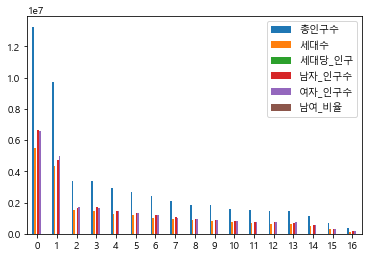

In [54]:
from matplotlib import rc
rc('font', family='Malgun Gothic')

newrank2.plot.bar(rot=0)

<AxesSubplot:>

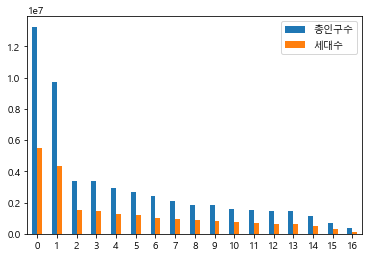

In [72]:
# 총인구수와 총세대수만 이용해서 바 그래프 그리기

newrank2.iloc[:, 1:3].plot.bar(rot=0)

In [57]:
data2

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
0,서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
1,부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
2,대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
4,광주광역시 (2900000000),1456121,618503,2.35,720686,735435,0.98
5,대전광역시 (3000000000),1473125,637726,2.31,735791,737334,1.00
6,울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
7,세종특별자치시 (3600000000),343788,136629,2.52,171403,172385,0.99
8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
9,강원도 (4200000000),1539521,721003,2.14,774358,765163,1.01


<class 'pandas.core.series.Series'>
<class 'list'>
       총인구수     총세대수
부산  3410925  1502333
대구  2432883  1033349
인천  2954955  1242107
광주  1456121   618503
대전  1473125   637726
울산  1145710   469551


<AxesSubplot:>

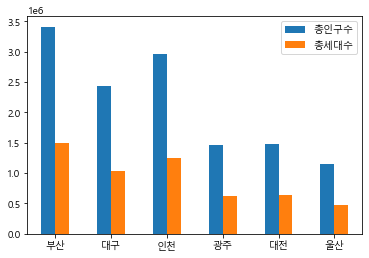

In [75]:
# 6개 광역시 데이터만 추출
index = ['부산','대구','인천','광주','대전','울산']

x1 = data2.iloc[1:7, 1]
print(type(x1))
x1 = x1.values.tolist()
print(type(x1))

x2 = data2.iloc[1:7, 2]
x2 = x2.values.tolist()

df = pd.DataFrame({'총인구수':x1, '총세대수':x2}, index=index)
print(df)

df.plot.bar(rot=0)

- 남자 인구수가 여자 인구수보다 많은 지역의 남여 인구수를 그래프로 그려보기

In [92]:
data3 = data2[data2['남자_인구수'] > data2['여자_인구수']]
data3

,지역,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율
3,인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
6,울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
8,경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
9,강원도 (4200000000),1539521,721003,2.14,774358,765163,1.01
10,충청북도 (4300000000),1598599,723931,2.21,809805,788794,1.03
11,충청남도 (4400000000),2120995,961890,2.21,1081153,1039842,1.04
13,전라남도 (4600000000),1861894,873871,2.13,934900,926994,1.01
14,경상북도 (4700000000),2658956,1229265,2.16,1338907,1320049,1.01
15,경상남도 (4800000000),3358828,1455655,2.31,1690600,1668228,1.01
16,제주특별자치도 (5000000000),670876,293932,2.28,337295,333581,1.01


<AxesSubplot:xlabel='남자_인구수', ylabel='여자_인구수'>

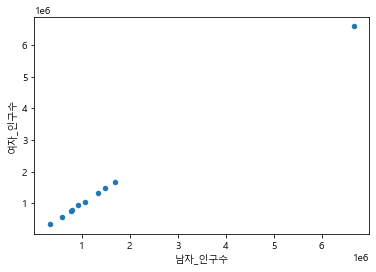

In [93]:
data3.plot.scatter(x='남자_인구수', y='여자_인구수')

['인천광역시  (2800000000)', '울산광역시  (3100000000)', '경기도  (4100000000)', '강원도  (4200000000)', '충청북도  (4300000000)', '충청남도  (4400000000)', '전라남도  (4600000000)', '경상북도  (4700000000)', '경상남도  (4800000000)', '제주특별자치도  (5000000000)']
                        남자 인구수   여자 인구수
인천광역시  (2800000000)    1481133  1473822
울산광역시  (3100000000)     588626   557084
경기도  (4100000000)      6672706  6592671
강원도  (4200000000)       774358   765163
충청북도  (4300000000)      809805   788794
충청남도  (4400000000)     1081153  1039842
전라남도  (4600000000)      934900   926994
경상북도  (4700000000)     1338907  1320049
경상남도  (4800000000)     1690600  1668228
제주특별자치도  (5000000000)   337295   333581


<AxesSubplot:>

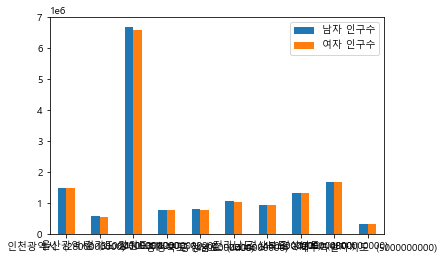

In [101]:
m1 = data3.iloc[:, 4]
m1 = m1.values.tolist()

w2 = data3.iloc[:, 5]
w2 = w2.values.tolist()

p = data3.iloc[:, 0]
p = p.values.tolist()
print(p)

mw = pd.DataFrame({'남자 인구수':m1, '여자 인구수':w2}, index=p)
print(mw)

mw.plot.bar(rot=0)

- 세대당 인구수가 가장 많은 지역과 가장 적은 지역의 인구수와 세대수를 그래프로 나타내기

In [97]:
data2['세대당_인구'].argmax()

7

In [98]:
data2.iloc[data2['세대당_인구'].argmax(), :]

지역        세종특별자치시  (3600000000)
총인구수                     343788
세대수                      136629
세대당_인구                     2.52
남자_인구수                   171403
여자_인구수                   172385
남여_비율                      0.99
Name: 7, dtype: object

In [99]:
data2.iloc[data2['세대당_인구'].argmin(), :]

지역        전라남도  (4600000000)
총인구수                 1861894
세대수                   873871
세대당_인구                  2.13
남자_인구수                934900
여자_인구수                926994
남여_비율                   1.01
Name: 13, dtype: object

In [ ]:
# 나머지 부분은 각자 완성해봅시다.